# Cara Membuat Peta (shpfile) dengan Python

Inilah tutorial membuat peta di Python dengan langkah-langkah yang ada.

Data itu diambil dari publikasi PS Kab. Tangerang dalam Angka 2024. Publikasi ini memiliki banyak bagian data yang bisa digunakan. Saya menggunakan data Tinggi Wilayah dan Jarak ke Ibukota Kabupaten/Kota Menurut Kecamatan di Kabupaten Tangerang pada tahun 2023. Data itu bisa dicari di sini: 

https://tangerangkab.bps.go.id/id/publication/2024/02/28/94f4bf4039fbb911093c8848/kabupaten-tangerang-dalam-angka-2024.html 

Note: Beberapa data itu tidak muncul di peta dikarenakan tidak ada data tersebut dan juga ada yang sedikit edit di dalam data supaya rapi dan sesuai dengan visualisasi data. Tambah lagi, tanda “warning” itu bukan menjadi masalah asal kode itu bisa dijalankan.


### Langkah Pertama: Siapkan paket data di R untuk bisa menjalankan kode Python

Paket data yang digunakan adalah pandas, geopandas, matplotlib, contextily, scale bar (dengan format "from matplotlib_scalebar.scalebar), dan numpy.

In [4]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from matplotlib_scalebar.scalebar import ScaleBar
import numpy as np

### Langkah kedua: Mengimpor data excel dan membersihkan datanya.

Pastikan data yang dibuat di excel itu sesuai dengan data di BPS.

In [ ]:
data_tangerang = pd.read_excel('C:/Data Sains/Data Kabupaten Tangerang.xlsx', skiprows=4, 
                              names=['Kecamatan', 'Tinggi', 'Jarak_Ibukota'])

data_tangerang = data_tangerang.dropna(subset=['Kecamatan'])
data_tangerang['Kecamatan'] = data_tangerang['Kecamatan'].str.title()
data_tangerang['Jarak_Ibukota'] = pd.to_numeric(data_tangerang['Jarak_Ibukota'], errors='coerce')
print(data_tangerang)

        Kecamatan  Tinggi  Jarak_Ibukota
0          Solear   42.76           7.43
1       Tigaraksa   31.47            NaN
2           Jambe   37.19           6.15
3          Cikupa   28.29           6.97
4        Panongan   35.25           7.08
5           Curug   35.77          10.78
6      Kelapa Dua   25.50          16.39
7           Legok   44.00          12.65
8      Pagedangan   30.09          16.00
9          Cisauk   53.97          21.05
10    Pasar Kemis   16.86          13.41
11   Sindang Jaya   15.81          12.49
12       Balaraja   20.77           7.29
13        Jayanti   15.71          10.91
14     Suka Mulya   12.76          11.96
15         Kresek   10.23          16.41
16   Gunung Kaler    4.20          20.72
17         Kronjo    1.81          20.48
18     Mekar Baru    2.66          24.60
19           Mauk    1.08          22.68
20         Kemiri    2.12          19.73
21       Sukadiri    6.10          24.20
22          Rajeg    2.68          18.20
23        Sepata

### Langkah ketiga: Mengimpor data spasial Kabupaten Tangerang

Bentuk data shapefile itu bisa dicari di GADM. Caranya adalah:

a.	Buka situs GADM. 
b.	Pilih “Indonesia”.
c.	Download shapefile Indonesia yang akan menjadi format zip.
d.	Extract file dan masukin ke Python.

Setelah itu, filter data spasial tersbut dengan format level 3. Level tersebut akan memunculkan data kabupaten dan kecamatan tersebut. Selanjutnya filter data menjadi kabupaten Tangerang dan nama kecamatan yang sesuai.


In [9]:
tangerang_kec = gpd.read_file('C:/Tugas 3 Pengantar Data Sains/gadm41_IDN_shp (1)/gadm41_IDN_3.shp')
tangerang_kec = tangerang_kec[tangerang_kec['NAME_2'] == 'Tangerang']
tangerang_kec['Kecamatan'] = tangerang_kec['NAME_3'].str.replace('Suka Mulya', 'Sukamulya').str.replace('Gunung Kaler', 'Gunungkaler')
print(tangerang_kec)

            GID_3 GID_0    COUNTRY    GID_1  NAME_1 NL_NAME_1      GID_2  \
497   IDN.4.8.1_1   IDN  Indonesia  IDN.4_1  Banten        NA  IDN.4.8_1   
498   IDN.4.8.2_1   IDN  Indonesia  IDN.4_1  Banten        NA  IDN.4.8_1   
499   IDN.4.8.3_1   IDN  Indonesia  IDN.4_1  Banten        NA  IDN.4.8_1   
500   IDN.4.8.4_1   IDN  Indonesia  IDN.4_1  Banten        NA  IDN.4.8_1   
501   IDN.4.8.5_1   IDN  Indonesia  IDN.4_1  Banten        NA  IDN.4.8_1   
502   IDN.4.8.6_1   IDN  Indonesia  IDN.4_1  Banten        NA  IDN.4.8_1   
503   IDN.4.8.7_1   IDN  Indonesia  IDN.4_1  Banten        NA  IDN.4.8_1   
504   IDN.4.8.8_1   IDN  Indonesia  IDN.4_1  Banten        NA  IDN.4.8_1   
505   IDN.4.8.9_1   IDN  Indonesia  IDN.4_1  Banten        NA  IDN.4.8_1   
506  IDN.4.8.10_1   IDN  Indonesia  IDN.4_1  Banten        NA  IDN.4.8_1   
507  IDN.4.8.11_1   IDN  Indonesia  IDN.4_1  Banten        NA  IDN.4.8_1   
508  IDN.4.8.12_1   IDN  Indonesia  IDN.4_1  Banten        NA  IDN.4.8_1   
509  IDN.4.8

### Langkah keempat: Gabungkan data spasial dan atribut menjadi satu

In [10]:
tangerang_full = tangerang_kec.merge(data_tangerang, on='Kecamatan', how='left')
tangerang_full = tangerang_full.to_crs(epsg=3857)
print(tangerang_full)

           GID_3 GID_0    COUNTRY    GID_1  NAME_1 NL_NAME_1      GID_2  \
0    IDN.4.8.1_1   IDN  Indonesia  IDN.4_1  Banten        NA  IDN.4.8_1   
1    IDN.4.8.2_1   IDN  Indonesia  IDN.4_1  Banten        NA  IDN.4.8_1   
2    IDN.4.8.3_1   IDN  Indonesia  IDN.4_1  Banten        NA  IDN.4.8_1   
3    IDN.4.8.4_1   IDN  Indonesia  IDN.4_1  Banten        NA  IDN.4.8_1   
4    IDN.4.8.5_1   IDN  Indonesia  IDN.4_1  Banten        NA  IDN.4.8_1   
5    IDN.4.8.6_1   IDN  Indonesia  IDN.4_1  Banten        NA  IDN.4.8_1   
6    IDN.4.8.7_1   IDN  Indonesia  IDN.4_1  Banten        NA  IDN.4.8_1   
7    IDN.4.8.8_1   IDN  Indonesia  IDN.4_1  Banten        NA  IDN.4.8_1   
8    IDN.4.8.9_1   IDN  Indonesia  IDN.4_1  Banten        NA  IDN.4.8_1   
9   IDN.4.8.10_1   IDN  Indonesia  IDN.4_1  Banten        NA  IDN.4.8_1   
10  IDN.4.8.11_1   IDN  Indonesia  IDN.4_1  Banten        NA  IDN.4.8_1   
11  IDN.4.8.12_1   IDN  Indonesia  IDN.4_1  Banten        NA  IDN.4.8_1   
12  IDN.4.8.13_1   IDN  I

### Langkah kelima: Membuat peta dan visualisasikan data 

Visualisasi peta tinggi wilayah per kecamatan

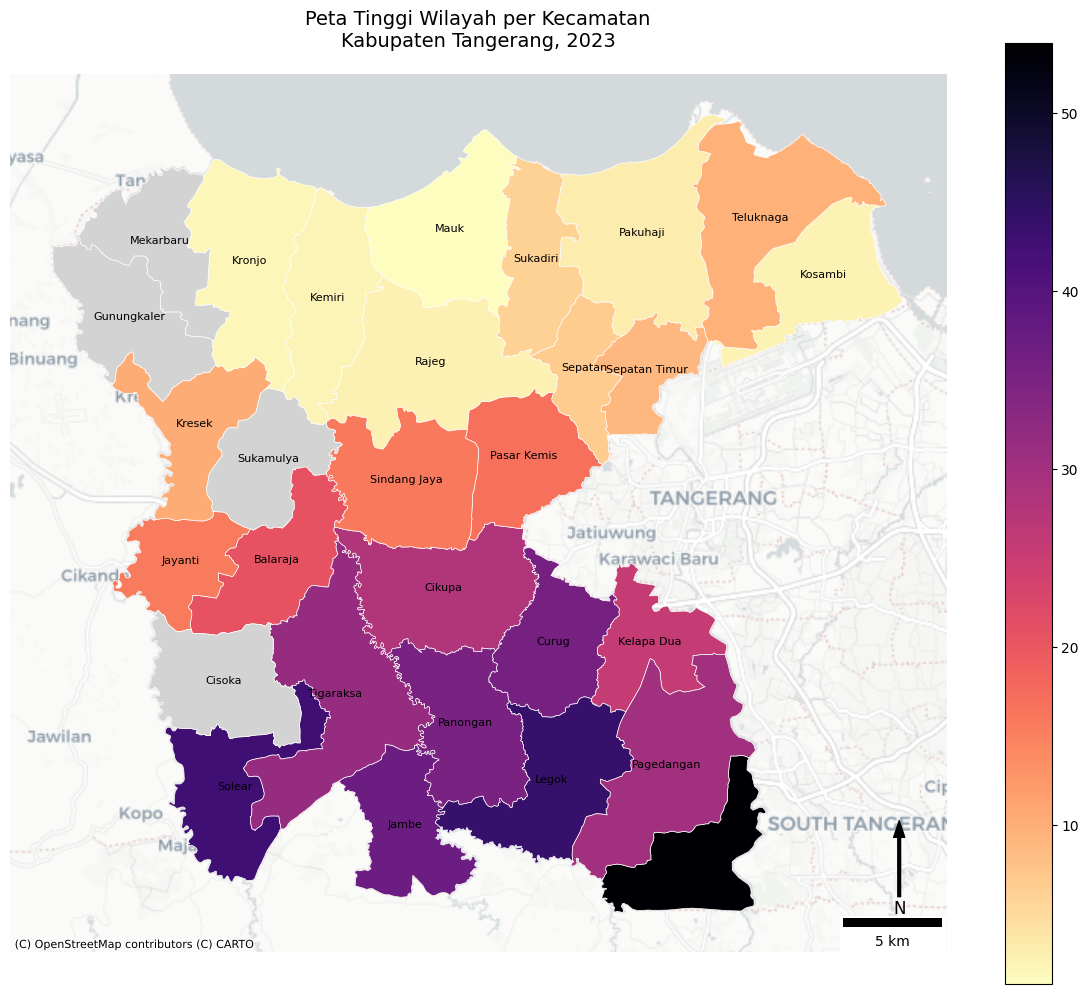

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))

tangerang_full.plot(column='Tinggi', ax=ax, legend=True,
                   cmap='magma_r', edgecolor='white', linewidth=0.5,
                   missing_kwds={'color': 'lightgrey'})

for x, y, label in zip(tangerang_full.geometry.centroid.x, 
                       tangerang_full.geometry.centroid.y,
                       tangerang_full['Kecamatan']):
    ax.text(x, y, label, fontsize=8, ha='center')

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

ax.add_artist(ScaleBar(1, location='lower right'))
x, y, arrow_length = 0.95, 0.15, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=2, headwidth=8),
            ha='center', va='center', fontsize=12,
            xycoords=ax.transAxes)

plt.title('Peta Tinggi Wilayah per Kecamatan\nKabupaten Tangerang, 2023', fontsize=14, pad=20)
plt.axis('off')

plt.tight_layout()
plt.savefig('tinggi_wilayah_tangerang.png', dpi=300, bbox_inches='tight')
plt.show()

Visualisasi peta jarak ibu kota kabupaten per kecamatan

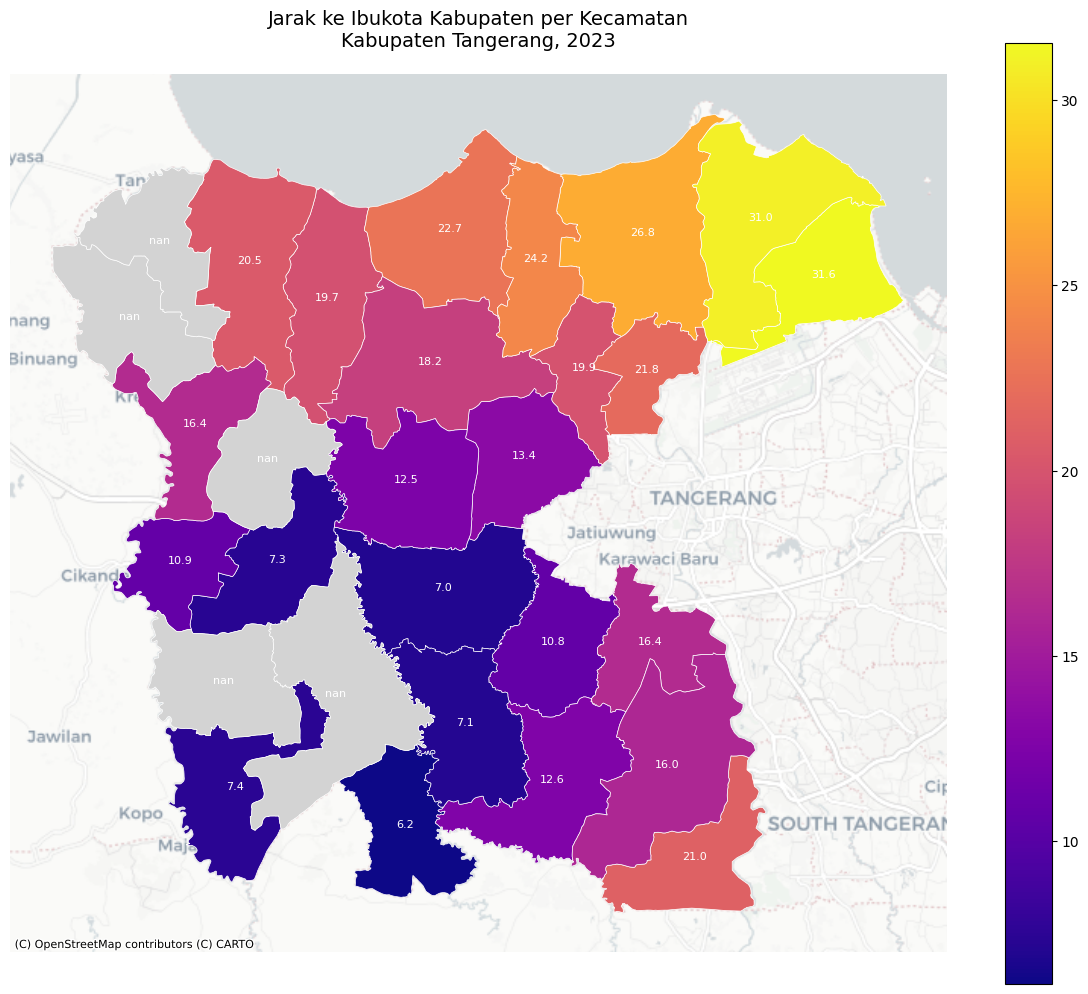

In [11]:
fig, ax = plt.subplots(figsize=(12, 10))

tangerang_full.plot(column='Jarak_Ibukota', ax=ax, legend=True,
                   cmap='plasma', edgecolor='white', linewidth=0.5,
                   missing_kwds={'color': 'lightgrey'})

for x, y, label in zip(tangerang_full.geometry.centroid.x, 
                       tangerang_full.geometry.centroid.y,
                       tangerang_full['Jarak_Ibukota'].round(1)):
    ax.text(x, y, f"{label}", fontsize=8, ha='center', color='white')

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

plt.title('Jarak ke Ibukota Kabupaten per Kecamatan\nKabupaten Tangerang, 2023', fontsize=14, pad=20)
plt.axis('off')

plt.tight_layout()
plt.savefig('jarak_ibukota_tangerang.png', dpi=300, bbox_inches='tight')
plt.show()

Hasilnya adalah peta kabupaten Tangerang dibagi menjadi kecamatan berdasarkan data tersebut.

### Langkah keenam: Analisis korelasi peta antara tinggi wilayah dan jarak ibu kota kabupaten per kecamatan.

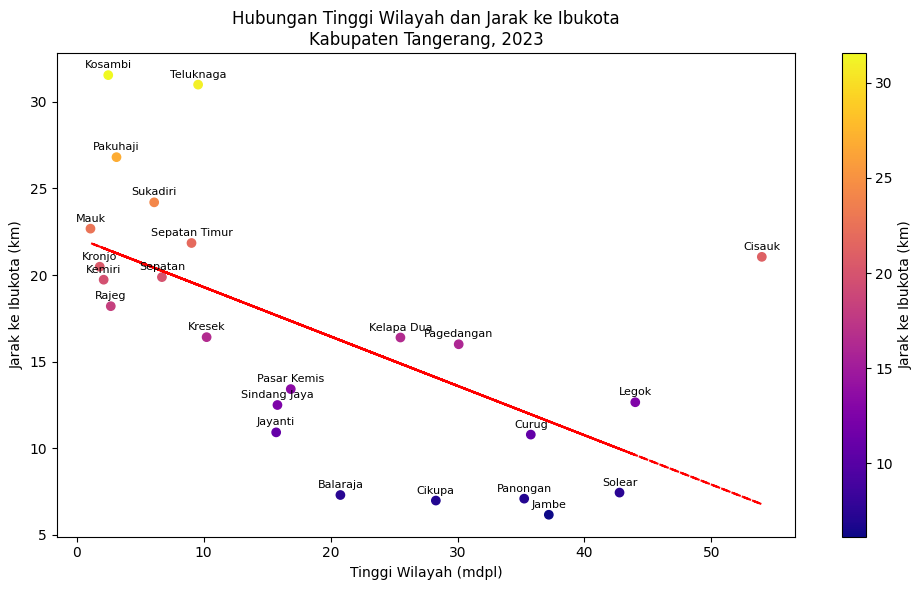

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))

scatter = ax.scatter(tangerang_full['Tinggi'],  
                   tangerang_full['Jarak_Ibukota'], 
                   c=tangerang_full['Jarak_Ibukota'], 
                   cmap='plasma')

for i, txt in enumerate(tangerang_full['Kecamatan']):
    ax.annotate(txt, 
               (tangerang_full['Tinggi'].iloc[i],  
                tangerang_full['Jarak_Ibukota'].iloc[i]),
               textcoords="offset points", 
               xytext=(0,5), 
               ha='center', 
               fontsize=8)

valid_data = tangerang_full[['Tinggi', 'Jarak_Ibukota']].dropna()
z = np.polyfit(valid_data['Tinggi'], 
              valid_data['Jarak_Ibukota'], 
              1)
p = np.poly1d(z)  

ax.plot(valid_data['Tinggi'], 
       p(valid_data['Tinggi']), 
       "r--")

plt.xlabel('Tinggi Wilayah (mdpl)')  
plt.ylabel('Jarak ke Ibukota (km)')
plt.title('Hubungan Tinggi Wilayah dan Jarak ke Ibukota\nKabupaten Tangerang, 2023')
plt.colorbar(scatter, label='Jarak ke Ibukota (km)')

plt.tight_layout()
plt.savefig('korelasi_tinggi_jarak.png', dpi=300)
plt.show()

Hasilnya adalah data korelasi antara peta tinggi wilayah dan jarak ibu kota kabupaten per kecamatan. Kita bisa melihat data point kecamatan, data korelasi, dan garis korelasi untuk melihat apakah kecamatan itu bedanya berapa dengan garis korelasi.

Link referensi Youtube:
1. https://www.youtube.com/watch?v=euCbgfj5DvM  
2. https://www.youtube.com/watch?v=t7lliJXFt8w 
3. https://www.youtube.com/watch?v=h5sy0z2BUTo 